# Lesson L &ndash; Data Loading


In this module, we will learn about features for:

  * loading data from a file into a Pandas DataFrame

  * saving data from a DataFrame into a file

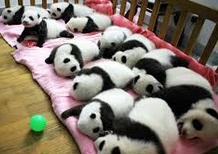

In order to run the examples in this module, you will first need to run the code in the cell below.  These four lines of code import the Series and DataFrame objects and the numpy and pandas libraries.





In [1]:
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np

When running examples in this module, if you ever get the error message:  **"NameError: name 'DataFrame' is not defined"**, then you need to need to re-run the cell above with the from/input statements.

### Data files required for this lesson

For this lesson, you will also need to have the following files **in the same directory** as this Jupyter notebook.
These were included in the .zip file that was posted with this notebook.

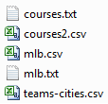

  * courses.txt
  * courses2.csv
  * mlb.csv
  * mlb.txt
  * teams-cities.csv


### Outline for this module:

* Tabular Data Structures (Pandas)
* Learning goals
  * Learn how to read formatted data from a file into a DataFrame
  * Learn how to save data in a DataFrame by writing it out to a file
* Readings
  * PDA Ch 6
* Topics
  * Reading CSV files
  * Reading other types of delimited files
  * Adding labels
  * Specifying indicies
  * Writing out (saving) DataFrames to a file
* Exercises
  * Exercise L1.2 - Reading data from a file into a DataFrame
  * Exercise L1.2 - Reading data from a file into a DataFrame with a Hierarchical Index





--------------------
### Reading CSV files with Pandas

The Pandas library includes a useful function, ``.read_csv()`` that can be used to read data in a comma-separated-value (csv) format from a file.

The file ``mlb.csv`` contains the following data about US baseball teams (you can look at the file in a text editor if you wish):

```
team,league,wins,losses,rs,ra
yankees,al,6,6,46,52
nationals,nl,7,5,60,50
cardinals,nl,7,5,48,48
redsox,al,5,7,44,50
braves,nl,8,4,46,33
cubs,nl,4,8,47,55
tigers,al,6,4,40,39
```

Each row contains data for one team, and the data elements are separated by commas.

We can read a file such as this into a Pandas DataFrame using ``pd.read_csv()``:

In [2]:
df = pd.read_csv('mlb.csv')
df

,team,league,wins,losses,rs,ra
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


* Notice that the ``.read_csv()`` command automatically uses the first row of the file for the column labels.

* Also notice that integers were used for the row index.

* Note:  If you get an error running the command above, make sure that the file ``mlb.csv`` is in the same directory as this Jupyter notebook.

--------------
### Reading files delimited by other characters

Sometimes files use characters other than a comma to delimit the fields of data.

For example, the file ``mlb.txt`` uses a vertical bar character ``|`` to separate the fields:

```
yankees|al|6|6|46|52
nationals|nl|7|5|60|50
cardinals|nl|7|5|48|48
redsox|al|5|7|44|50
braves|nl|8|4|46|33
cubs|nl|4|8|47|55
tigers|al|6|4|40|39
```

The function ``pd.read_table()`` provides several options that we can use to control how we read the data from a file into a DataFrame.

In the example below:

  * the first arguement, ``mlb.txt``, indicates the file we wish to read from
  
  * ``sep='|'`` indicates that the file uses a vertical bar as the field separator character
  
  * ``header=None`` indicates that the file does **not** contain a header line that can be used as the column index (headings).  In other words, the first line of the file contains the first row of actual data to be placed in the DataFrame.


In [3]:
df= pd.read_table('mlb.txt', sep='|', header=None)
df

,0,1,2,3,4,5
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


Notice that since we did not specify any row or column index, the Pandas assigns integers as the indicies (row index going from 0 to 6; column index going from 0 to 5).


--------------
#### Adding column labels

  * We can add column labels after reading in the DF


In [4]:
mylabels = ['team', 'league', 'wins', 'losses', 'rs', 'ra']
df.columns = mylabels
df

,team,league,wins,losses,rs,ra
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


-----------
### Naming the index

* Recall that you can name the row index of a DataFrame 


In [5]:
df.index.name = 'teamnum'
df

,team,league,wins,losses,rs,ra
teamnum,,,,,,
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


---------------------
### Exercise L1.1 &ndash; Reading data from a file into a DataFrame

* For this exercise, read data from the file courses.txt:

```
inls101:f12:12:3
inls161:f12:18:4
inls382:f12:15:4
inls101:f13:17:4
inls382:f13:21:4
```

* Use pd.read_csv() or pd.read_table() and other manipulations to produce a DF as shown below.

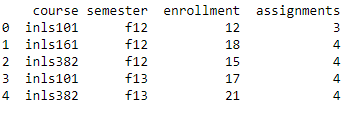


---------------
### Hierarchical Index Naming

  * You can also give names to level of a hierarchical index
  

In [6]:
df= DataFrame({'a':[1, 2, 3, 4],
               'b':[5, 6, 7, 8]},
              index=[['r','r','s','s'],
                     ['x', 'y', 'x', 'y']])
df

a  b
r x  1  5
  y  2  6
s x  3  7
  y  4  8

In [7]:
df.index.names = ['rors', 'xory']
df

a  b
rors xory      
r    x     1  5
     y     2  6
s    x     3  7
     y     4  8

-------------
### Read and specify a row index

* When reading, we can specify a column to use as the row index

For example, recall the version of the data in the file ``mlb.csv`` (the CSV file):

```
team,league,wins,losses,rs,ra
yankees,al,6,6,46,52
nationals,nl,7,5,60,50
cardinals,nl,7,5,48,48
redsox,al,5,7,44,50
braves,nl,8,4,46,33
cubs,nl,4,8,47,55
tigers,al,6,4,40,39
```

We can use the ``index_col`` argument to ``pd.read_csv()`` to indicate a particular column of data that we wish to use for the row index.

To do this, our data must have column labels (e.g., team, league, wins...).

In the example below, in one step, we read in the CSV file and specify that we wish to use the 'team' column of data as the **row** index:

In [8]:
df = pd.read_csv('mlb.csv', index_col='team')
df

,league,wins,losses,rs,ra
team,,,,,
yankees,al,6,6,46,52
nationals,nl,7,5,60,50
cardinals,nl,7,5,48,48
redsox,al,5,7,44,50
braves,nl,8,4,46,33
cubs,nl,4,8,47,55
tigers,al,6,4,40,39


-----------------
### Read and set a hierarchical index

* Two or more columns can be set a hierarchical index

For example, recall the version of the data in the file ``mlb.csv`` (the CSV file):

```
team,league,wins,losses,rs,ra
yankees,al,6,6,46,52
nationals,nl,7,5,60,50
cardinals,nl,7,5,48,48
redsox,al,5,7,44,50
braves,nl,8,4,46,33
cubs,nl,4,8,47,55
tigers,al,6,4,40,39
```

By specifying a list of columns that we wish to use for the row index (e.g., ``['league', 'team']``), Pandas will create a hierarchical index:


In [9]:
df= pd.read_csv('mlb.csv', index_col=['league', 'team'])
df

wins  losses  rs  ra
league team                           
al     yankees       6       6  46  52
nl     nationals     7       5  60  50
       cardinals     7       5  48  48
al     redsox        5       7  44  50
nl     braves        8       4  46  33
       cubs          4       8  47  55
al     tigers        6       4  40  39

----------
### Write out (save) a data frame to a file

* .to_csv() will save a data frame to disk

In addition to reading data **from** a file into a DataFrame,
we can also save data from a DataFrame **to** a file.

Let's look at an example.

First, let's read in the data from the ``mlb.txt`` file into a DataFrame:


In [10]:
df= pd.read_table('mlb.txt', sep='|', header=None)
df

,0,1,2,3,4,5
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


And then we can add back the column index as we did before:

In [11]:
mylabels = ['team', 'league', 'wins', 'losses', 'rs', 'ra']
df.columns = mylabels
df

,team,league,wins,losses,rs,ra
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


Now, to save the contents of this DataFrame to a comma-separated values (CSV) file, we can use the DataFrame method ``.to_csv()``.

This will write a file called ``mlb2.txt`` to the same directory as the mlb.txt file.

In [12]:
df.to_csv('mlb2.txt')

To check this, you can look at the contents of the mlb2.txt file in a text editor:

```
,team,league,wins,losses,rs,ra
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39
```


You could also use .read_csv() to read the mlb2.txt data into another DataFrame that we assign to variable ``df2``:

In [13]:
df2 = pd.read_csv('mlb2.txt')
df2

,Unnamed: 0,team,league,wins,losses,rs,ra
0,0,yankees,al,6,6,46,52
1,1,nationals,nl,7,5,60,50
2,2,cardinals,nl,7,5,48,48
3,3,redsox,al,5,7,44,50
4,4,braves,nl,8,4,46,33
5,5,cubs,nl,4,8,47,55
6,6,tigers,al,6,4,40,39


Notice that there is an extra column labelled "unnamed:0".

Where did this come from?

When we save the DataFrame using .to_csv(), it saved the row index as the first column of data in the .csv file.  However, since we did not give the row index a title, it did not have a label.

Then, when we used .read_csv() to read the data back into a DataFrame, Pandas treated the first column of data in the file as the first column of actual data to place into our new DataFrame **and** automatically generated a new row index of integers from 0 to 6.

There are several ways we could handle this.

One, we could choose not to write the row index out when we save the DataFrame:


In [14]:
df.to_csv('mlb3.txt', index=False)
df3 = pd.read_csv('mlb3.txt')
df3

,team,league,wins,losses,rs,ra
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


Or, we could give the row index a title:

In [15]:
df.index.name = "teamnum"
df

,team,league,wins,losses,rs,ra
teamnum,,,,,,
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


And then use .to_csv() to save the DataFrame to a file.
Then when we read the file back into a new DataFrame, we could specify that we want to use that column of data as our index:

In [16]:
df.to_csv('mlb4.txt')
df4 = pd.read_csv('mlb4.txt', index_col='teamnum')
df4

,team,league,wins,losses,rs,ra
teamnum,,,,,,
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


---------
#### .to_csv() options

The .to_csv() method allows us to pass arguments to customize how it saves the DataFrame.

  * ``index=False`` indicates to **not** save the row index
  * ``header=False`` indicates to **not** save the columm index (column headers)

In [17]:
df

,team,league,wins,losses,rs,ra
teamnum,,,,,,
0,yankees,al,6,6,46,52
1,nationals,nl,7,5,60,50
2,cardinals,nl,7,5,48,48
3,redsox,al,5,7,44,50
4,braves,nl,8,4,46,33
5,cubs,nl,4,8,47,55
6,tigers,al,6,4,40,39


In [18]:
df.to_csv('mlb5.txt', index=False, header=False)

The mlb5.txt file will then contain:

```
yankees,al,6,6,46,52
nationals,nl,7,5,60,50
cardinals,nl,7,5,48,48
redsox,al,5,7,44,50
braves,nl,8,4,46,33
cubs,nl,4,8,47,55
tigers,al,6,4,40,39
```


--------------
### What about Series?

  * .to_csv() works pretty much as you would expect with a Series

  * You can use .read_csv() to create a Series, but it requires some work
    * No header
    * First column should be set as the index

  * There is also a series.from_csv() method


---------------------
### Exercise L1.2 &ndash; Reading data from a file into a DataFrame with a Hierarchical Index

* For this exercise, read data from the file courses.txt:

```
inls101:f12:12:3
inls161:f12:18:4
inls382:f12:15:4
inls101:f13:17:4
inls382:f13:21:4
```


* Use pd.read_csv() or pd.read_table() and other manipulations to produce a DF with a hierarchical index as shown below.

  * Start by creating the DF with a hierarchical index

  * Then add names/labels to the index and columns
  
  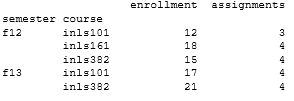